In [1]:
import pandas as pd 
import seaborn as sns 
import matplotlib.pyplot as plt 
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation
from keras.optimizers import SGD
from sklearn.metrics import roc_curve, auc,classification_report, accuracy_score, roc_auc_score,confusion_matrix

data_train=pd.read_csv('train.csv')
data_test=pd.read_csv('test.csv')

In [2]:
X_train = data_train.loc[ : , data_train.columns != 'y'] 
y_train = data_train["y"]
X_test = data_test.loc[ : , data_test.columns != 'y'] 
y_test = data_test["y"]

In [3]:
from sklearn.neural_network import MLPClassifier
X = X_train.to_numpy()
y = y_train.to_numpy()
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X, y) 

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [4]:
clf.fit(X, y).score(X,y)

0.975

In [5]:
pred=clf.predict(X_test.to_numpy())
prob=clf.predict_proba(X_test)[::,1]
pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0,

In [6]:
[coef.shape for coef in clf.coefs_]

[(20, 5), (5, 2), (2, 1)]

In [7]:
clf.predict_proba(X_test.to_numpy())

array([[9.05924619e-01, 9.40753808e-02],
       [9.81695667e-01, 1.83043330e-02],
       [1.00000000e+00, 2.13721983e-81],
       ...,
       [9.05924619e-01, 9.40753808e-02],
       [1.00000000e+00, 6.90028989e-15],
       [0.00000000e+00, 1.00000000e+00]])

In [8]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
accuracy_score(y_test,pred)

[[425  66]
 [138 371]]
              precision    recall  f1-score   support

           0       0.75      0.87      0.81       491
           1       0.85      0.73      0.78       509

    accuracy                           0.80      1000
   macro avg       0.80      0.80      0.80      1000
weighted avg       0.80      0.80      0.80      1000



0.796

In [9]:
from sklearn.metrics import recall_score
recall_score(y_test,pred)

0.7288801571709234

In [10]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test, pred)))

F1 Score: 0.7843551797040168


In [11]:
roc_auc = roc_auc_score(y_test, prob)
print('AUC: %.2f' % roc_auc + "%")

AUC: 0.76%


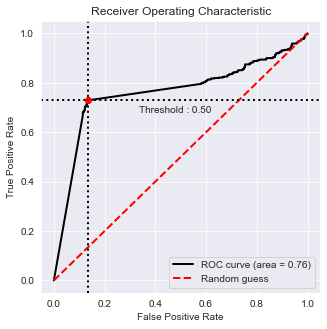

In [12]:
from plot_metric.functions import BinaryClassification

# Visualisation with plot_metric
bc = BinaryClassification(y_test,
                          prob,
                          labels = ["Class 1", "Class 2"])

# Figures
plt.figure(figsize = (5,5))
bc.plot_roc_curve()
plt.show()

After Scaling Data

In [13]:
from sklearn.preprocessing import StandardScaler  
scaler = StandardScaler()

X_train=X_train.to_numpy()
X_test=X_test.to_numpy()
y_train=y_train.to_numpy()
y_test=y_test.to_numpy()

scaler.fit(X_train)  
X_train = scaler.transform(X_train)  
X_test = scaler.transform(X_test)

In [14]:
from sklearn.neural_network import MLPClassifier
X = X_train
y = y_train
clf = MLPClassifier(solver='lbfgs', alpha=1e-5,
                    hidden_layer_sizes=(5, 2), random_state=1)
clf.fit(X, y) 

MLPClassifier(alpha=1e-05, hidden_layer_sizes=(5, 2), random_state=1,
              solver='lbfgs')

In [15]:
clf.fit(X,y).score(X,y)

0.975

In [16]:
pred=clf.predict(X_test)
prob=clf.predict_proba(X_test)[::,1]
pred

array([0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0,

In [17]:
[coef.shape for coef in clf.coefs_]

[(20, 5), (5, 2), (2, 1)]

In [18]:
clf.predict_proba(X_test)

array([[9.53662199e-01, 4.63378008e-02],
       [9.53662199e-01, 4.63378008e-02],
       [9.53662199e-01, 4.63378008e-02],
       ...,
       [0.00000000e+00, 1.00000000e+00],
       [6.00916562e-06, 9.99993991e-01],
       [0.00000000e+00, 1.00000000e+00]])

In [19]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
accuracy_score(y_test,pred)

[[379 112]
 [138 371]]
              precision    recall  f1-score   support

           0       0.73      0.77      0.75       491
           1       0.77      0.73      0.75       509

    accuracy                           0.75      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.75      0.75      0.75      1000



0.75

In [20]:
roc_auc = roc_auc_score(y_test, prob)
print('AUC: %.2f' % roc_auc + "%")

AUC: 0.79%


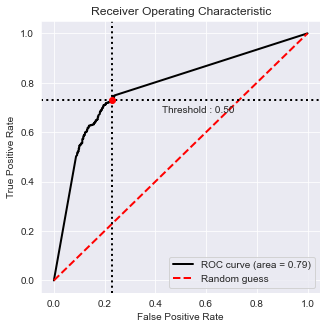

In [21]:
from plot_metric.functions import BinaryClassification

# Visualisation with plot_metric
bc = BinaryClassification(y_test,
                          prob,
                          labels = ["Class 1", "Class 2"])

# Figures
plt.figure(figsize = (5,5))
bc.plot_roc_curve()
plt.show()

Control with warm_start

In [22]:
clf = MLPClassifier(hidden_layer_sizes=(13,10,15), random_state=None, max_iter=1000, warm_start=True)
for i in range(10):
     clf.fit(X, y)

In [23]:
clf.fit(X,y).score(X,y)

1.0

In [24]:
pred=clf.predict(X_test)
prob=clf.predict_proba(X_test)[::,1]
pred

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1,
       0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1,
       0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0,

In [25]:
[coef.shape for coef in clf.coefs_]

[(20, 13), (13, 10), (10, 15), (15, 1)]

In [26]:
clf.predict_proba(X_test)

array([[9.98319087e-01, 1.68091253e-03],
       [9.99556079e-01, 4.43921158e-04],
       [9.99760943e-01, 2.39056719e-04],
       ...,
       [8.66007597e-01, 1.33992403e-01],
       [9.99999931e-01, 6.85047935e-08],
       [2.38493141e-06, 9.99997615e-01]])

In [27]:
print(confusion_matrix(y_test, pred))
print(classification_report(y_test, pred))
accuracy_score(y_test,pred)

[[370 121]
 [124 385]]
              precision    recall  f1-score   support

           0       0.75      0.75      0.75       491
           1       0.76      0.76      0.76       509

    accuracy                           0.76      1000
   macro avg       0.75      0.75      0.75      1000
weighted avg       0.76      0.76      0.76      1000



0.755

In [28]:
roc_auc = roc_auc_score(y_test, prob)
print('AUC: %.2f' % roc_auc + "%")

AUC: 0.81%


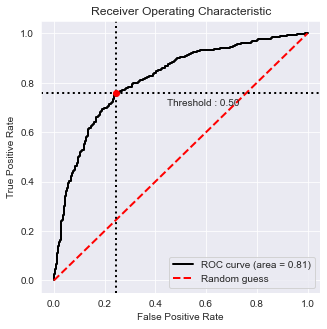

In [29]:
from plot_metric.functions import BinaryClassification

# Visualisation with plot_metric
bc = BinaryClassification(y_test,
                          prob,
                          labels = ["Class 1", "Class 2"])

# Figures
plt.figure(figsize = (5,5))
bc.plot_roc_curve()
plt.show()

In [30]:
from sklearn.metrics import recall_score
recall_score(y_test,pred)

0.756385068762279

In [31]:
from sklearn.metrics import f1_score
print("F1 Score: {}".format(f1_score(y_test, pred)))

F1 Score: 0.7586206896551724
